In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### The Keeling Curve, Mona Loa, Scripps Institution of Oceanography
Data Source: http://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record

In [2]:
co2_url = 'http://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv'
co2 = pd.read_csv(co2_url)
co2.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 33, saw 4


**Insider tip:** Scientists have a penchant for very long headers. Theoretically anyone who looks at the file should be able to understands how the data were generated, its limitations, and other metadata. They also love -99.99 as a NaN value (or similar variations).

Looking at the error message, I manually adjusted the header information and look for changes in expected fields (i.e. the width). Eventually I confirmed there was a 56 row header!

In [4]:
co2 = pd.read_csv(co2_url,skiprows=57, na_values=-99.99,
                  names=['Year','Month','ExcelDate','DateYears','CO2ppm','CO2ppmSeasonAdj',\
                         'fit','CO2ppmSeasonAdjFit','CO2ppmFilled','CO2ppmSeasonAdjFilled'])
co2.head()

,Year,Month,ExcelDate,DateYears,CO2ppm,CO2ppmSeasonAdj,fit,CO2ppmSeasonAdjFit,CO2ppmFilled,CO2ppmSeasonAdjFilled
0,1958,1,21200,1958.0411,NaN,NaN,NaN,NaN,NaN,NaN
1,1958,2,21231,1958.1260,NaN,NaN,NaN,NaN,NaN,NaN
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


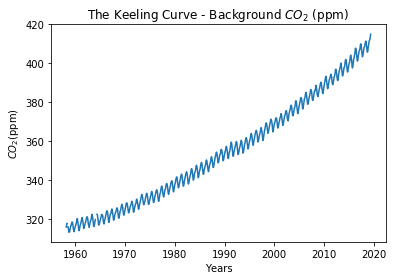

In [13]:
plt.plot(co2.DateYears,co2.CO2ppm)
plt.title('The Keeling Curve - Background ' + '$CO_2$' + ' (ppm)')
plt.xlabel('Years')
plt.ylabel('$CO_2$' + '(ppm)')
plt.show()

Appropos of nothing, how are we doing on renewable energy? Let's look at some wind power capacity data.

In [298]:
wind_url = './result.csv'
wind = pd.read_csv('result.csv')
# https://openei.org/wiki/Map_of_Wind_Farms/Data

In [299]:
wind.head()

,Facility Name,Facility,FacilityType,Owner,Developer,EnergyPurchaser,Place,GeneratingCapacity,NumberOfUnits,CommercialOnlineDate,WindTurbineManufacturer,FacilityStatus,Coordinates
0,251 Wind,251 Wind,NaN,NaN,NaN,NaN,"Kern County, CA",18.43 MW,194.0,1987.0,Vestas,NaN,"35.0861°, -118.3533°"
1,3-D Metals,3-D Metals,Definition:Small Scale Wind,NaN,NaN,NaN,Valley City OH,0.1 MW,1.0,2009.0,Northern Power Systems,In Service,"41.2481°, -81.8831°"
2,30 MW Iowa DG Portfolio,30 MW Iowa DG Portfolio,NaN,NaN,NaN,NaN,"Story County, IA",30 MW,10.0,2017.0,Nordex,NaN,"42.0136°, -93.5181°"
3,6th Space Warning Squadron,6th Space Warning Squadron,NaN,NaN,NaN,NaN,"Barnstable County, MA",3.36 MW,2.0,2013.0,GE Wind,NaN,"41.7525°, -70.5417°"
4,AB Tehachapi Wind Farm,AB Tehachapi,Commercial Scale Wind,Coram Energy,AB Energy,Southern California Edison Co,"Tehachapi, California",6.97 MW,31.0,1992.0,Vestas,In Service,"35.0533°, -118.2686°"


In [138]:
wind['CapacityMW'] = wind.GeneratingCapacity.map(lambda x: x.strip('MW') if isinstance(x, str) else x)
wind['CapacityMW'] = wind.CapacityMW.map(float)

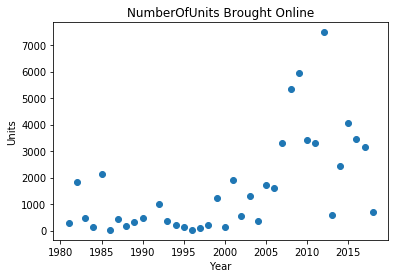

In [141]:
plt.scatter(wind.groupby('CommercialOnlineDate').sum()['NumberOfUnits'].index,wind.groupby('CommercialOnlineDate').sum()['NumberOfUnits'])
plt.title('NumberOfUnits Brought Online')
plt.xlabel('Year')
plt.ylabel('Units')
plt.show()

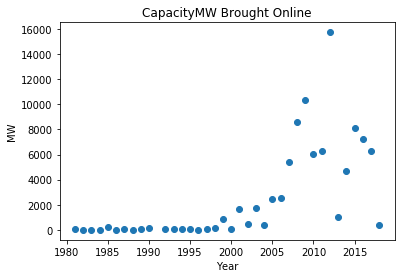

In [142]:
plt.scatter(wind.groupby('CommercialOnlineDate').sum()['CapacityMW'].index,wind.groupby('CommercialOnlineDate').sum()['CapacityMW'])
plt.title('CapacityMW Brought Online')
plt.xlabel('Year')
plt.ylabel('MW')
plt.show()

What's caused that dip in 2013? Well, lots of ideas.

In [166]:
mortality_url = 'UN_MortalityData.csv'
mortality = pd.read_csv(mortality_url,skiprows = 1,encoding = 'ISO-8859-1')
# source: UN.org
new_columns_map = dict(zip(mortality.columns,['RegionCode', 'RegionName', 'Year', 'Series', 'Value','Footnotes', 'Source']))
mortality.rename(columns = new_columns_map, inplace = True)

In [174]:
mortality.groupby('Year').count()

,RegionCode,RegionName,Series,Value,Footnotes,Source
Year,,,,,,
2000,15,15,15,15,4,15
2001,8,8,8,8,0,8
2002,3,3,3,3,0,3
2003,2,2,2,2,0,2
2004,11,11,11,11,3,11
2005,1618,1618,1618,1618,1422,1618
2006,9,9,9,9,2,9
2007,4,4,4,4,3,4
2008,6,6,6,6,1,6


In [179]:
mortality[mortality.Year == 2005]['RegionName']

0       Total, all countries or areas
1       Total, all countries or areas
2       Total, all countries or areas
3       Total, all countries or areas
4       Total, all countries or areas
5       Total, all countries or areas
6       Total, all countries or areas
21                             Africa
22                             Africa
23                             Africa
24                             Africa
25                             Africa
26                             Africa
39                    Northern Africa
40                    Northern Africa
41                    Northern Africa
42                    Northern Africa
43                    Northern Africa
44                    Northern Africa
45                    Northern Africa
60                 Sub-Saharan Africa
61                 Sub-Saharan Africa
62                 Sub-Saharan Africa
63                 Sub-Saharan Africa
64                 Sub-Saharan Africa
65                 Sub-Saharan Africa
66          

Let's try and find a happier data set...

In [223]:
# https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-1
fbi = pd.read_excel('fbi_crime.xls',skiprows = 3,nrows=20)

In [224]:
new_columns = fbi.columns.map(lambda x: x.replace('\n',' ').title().replace(' ',''))

In [233]:
newcol_dict = dict(zip(fbi.columns,new_columns))
fbi.rename(columns = newcol_dict, inplace = True)
fbi['Year'] = fbi['Year'].map(lambda x: int(str(x)[:4]))# get rid of footnotes

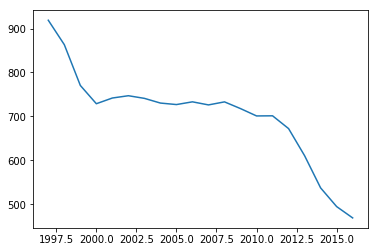

In [236]:
plt.plot(fbi['Year'], fbi['BurglaryRate'])
#plt.plot(fbi['Year'], fbi['Burglary'])
plt.show()

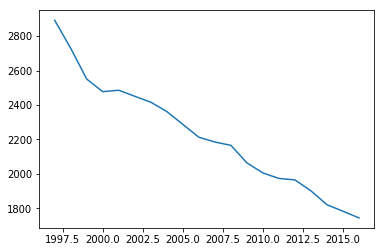

In [237]:
plt.plot(fbi['Year'], fbi['Larceny-TheftRate'])
plt.show()

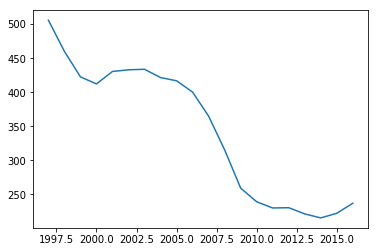

In [238]:
plt.plot(fbi['Year'], fbi['MotorVehicleTheftRate'])
plt.show()

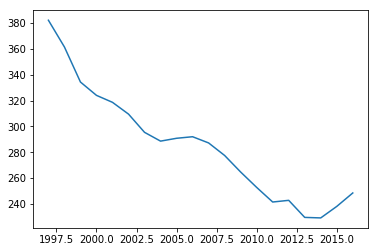

In [241]:
plt.plot(fbi['Year'], fbi['AggravatedAssaultRate'])
plt.show()

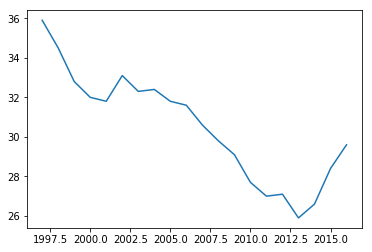

In [245]:
plt.plot(fbi['Year'], fbi['Rape(LegacyDefinition)Rate4'])
plt.show()

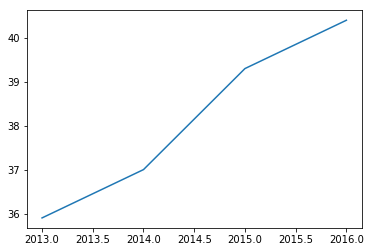

In [246]:
plt.plot(fbi['Year'], fbi['Rape(RevisedDefinition)Rate3'])
plt.show()

Okay, let's reallly try hard to be lighthearted.

In [251]:
spotify_csv = './Most_Streamed_Spotify_Songs.csv'
songs = pd.read_csv(spotify_csv, encoding = 'ISO-8859-1')# this is a popular type?
# data from Datazar. Data pull date unknown. 

In [261]:
songs['PublicationDatetime'] = pd.to_datetime(songs['Publication Date'], format = '%d-%b-%y')
# note: %d was able to handle non zero leading values at the beginning of a string

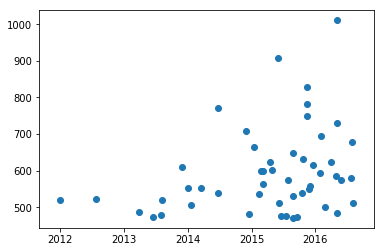

In [265]:
plt.scatter(songs['PublicationDatetime'],songs['Streams (In Millions)'])
plt.title("Streaming Data from Spotify")
plt.xlabel("Date of Publication")
plt.ylabel('Millions of Streams')
plt.show()

In [264]:
songs['PublicationDatetime'].value_counts()

2016-05-06    3
2015-08-28    3
2015-11-13    3
2015-03-10    2
2014-06-21    2
2015-10-14    1
2015-12-17    1
2016-07-29    1
2016-04-01    1
2014-01-01    1
2012-07-24    1
2016-02-05    1
2015-06-01    1
2014-12-02    1
2014-03-17    1
2016-07-22    1
2016-01-29    1
2014-01-17    1
2015-10-23    1
2016-05-27    1
2013-11-29    1
2015-11-27    1
2015-12-04    1
2015-02-10    1
2013-07-30    1
2015-06-16    1
2015-07-31    1
2015-06-09    1
2014-12-15    1
2015-04-28    1
2015-01-12    1
2016-04-29    1
2013-03-26    1
2013-06-18    1
2015-02-24    1
2016-02-26    1
2012-01-01    1
2013-08-08    1
2015-07-17    1
2015-04-14    1
2016-08-05    1
2015-09-18    1
Name: PublicationDatetime, dtype: int64

Are people more educated?

In [267]:
census_path = './CensusGov/ACSST5Y2017.S1501_data_with_overlays_2019-07-23T225517.csv'
census = pd.read_csv(census_path)

In [268]:
census.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C02_001E,S1501_C02_001M,S1501_C03_001E,S1501_C03_001M,S1501_C04_001E,S1501_C04_001M,...,S1501_C02_064E,S1501_C02_064M,S1501_C03_064E,S1501_C03_064M,S1501_C04_064E,S1501_C04_064M,S1501_C05_064E,S1501_C05_064M,S1501_C06_064E,S1501_C06_064M
0,id,Geographic Area Name,Estimate!!Total!!Population 18 to 24 years,Margin of Error!!Total MOE!!Population 18 to 2...,Estimate!!Percent!!Population 18 to 24 years,Margin of Error!!Percent MOE!!Population 18 to...,Estimate!!Male!!Population 18 to 24 years,Margin of Error!!Male MOE!!Population 18 to 24...,Estimate!!Percent Male!!Population 18 to 24 years,Margin of Error!!Percent Male MOE!!Population ...,...,Estimate!!Percent!!MEDIAN EARNINGS IN THE PAST...,Margin of Error!!Percent MOE!!MEDIAN EARNINGS ...,Estimate!!Male!!MEDIAN EARNINGS IN THE PAST 12...,Margin of Error!!Male MOE!!MEDIAN EARNINGS IN ...,Estimate!!Percent Male!!MEDIAN EARNINGS IN THE...,Margin of Error!!Percent Male MOE!!MEDIAN EARN...,Estimate!!Female!!MEDIAN EARNINGS IN THE PAST ...,Margin of Error!!Female MOE!!MEDIAN EARNINGS I...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female MOE!!MEDIAN EA...
1,0100000US,United States,31131484,9757,(X),(X),15968535,6457,(X),(X),...,(X),(X),87504,203,(X),(X),58868,120,(X),(X)


In [270]:
cdc_url = 'https://chronicdata.cdc.gov/api/views/wsas-xwh5/rows.csv?accessType=DOWNLOAD'
cdc = pd.read_csv(cdc_url)

C:\Users\Michelle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [276]:
cdc.groupby('YEAR')['Data_Value'].mean()

YEAR
2011         28.845399
2011         28.530738
2011-2012    13.004724
2012         28.240574
2012-2013    12.435000
2013         28.285885
2013-2014    12.423992
2014         28.036933
2014-2015    12.327912
2015         27.818996
2015-2016    12.022267
2016         25.304071
2016-2017     9.514343
2017         25.291137
Name: Data_Value, dtype: float64